## Explainable AI - Understanding and Trusting Machine Learning Models

### What Is Explainable AI (XAI)?
Explainable AI refers to a set of processes and methods that aim to provide a clear and human-understandable explanation for the decisions generated by AI and machine learning models.

Integrating an explainability layer into these models, Data Scientists and Machine Learning practitioners can create more trustworthy and transparent systems to assist a wide range of stakeholders such as developers, regulators, and end-users.

### Building Trust Through Explainable AI
Here are some explainable AI principles that can contribute to building trust:

- **Transparency.** Ensuring stakeholders understand the models’ decision-making process.
- **Fairness.** Ensuring that the models’ decisions are fair for everyone, including people in protected groups (race, religion, gender, disability, ethnicity).
- Trust. Assessing the confidence level of human users using the AI system.
- **Robustness.** Being resilient to changes in input data or model parameters, maintaining consistent and reliable performance even when faced with uncertainty or unexpected situations.
- **Privacy.** Guaranteeing the protection of sensitive user information.
- **Interpretability.** Providing human-understandable explanations for their predictions and outcomes.

There are two broad categories of model explainability: model-specific methods and model-agnostic methods. 

In [5]:
# Load useful libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import pandas as pd

diabetes_data = pd.read_csv('./files/diabetes_2.csv')
# Separate Features and Target Variables
X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                	stratify =y,
                                                	random_state = 13)

# Build the model
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

rf_clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       166
           1       0.58      0.72      0.64        65

    accuracy                           0.77       231
   macro avg       0.73      0.76      0.74       231
weighted avg       0.80      0.77      0.78       231



### Model-agnostic methods
These methods can be applied to any machine learning model, regardless of its structure or type. They focus on analyzing the features’ input-output pair. This section will introduce and discuss LIME and SHAP, two widely-used surrogate models.

### SHAP
It stands for **SH**apley **A**dditive ex**P**lanations. This method aims to explain the prediction of an instance/observation by computing the contribution of each feature to the prediction, and it can be installed using the following pip command.

- The main shap library is imported.

- The TreeExplainer class is used to explain tree-based models, along with the initjs.

- shape.initjs() function initializes the JavaScript code required to display SHAP visualizations in a jupyter notebook environment.

- Finally, after instantiating the TreeExplainer class with the random forest classifier, the shape values are computed for each feature of each instance in the test dataset.

In [2]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)
# explainer = shap.Explainer(rf_clf,X_train)
# X_test = X_test.iloc[0:35]
shap_values = explainer.shap_values(X_test)
# shap_values = explainer(X_train[0:50])
shap_values

array([[[ 0.03570675, -0.03570675],
        [-0.35064111,  0.35064111],
        [-0.01560756,  0.01560756],
        ...,
        [ 0.11736735, -0.11736735],
        [-0.04913709,  0.04913709],
        [ 0.08576933, -0.08576933]],

       [[ 0.05035225, -0.05035225],
        [ 0.03605201, -0.03605201],
        [-0.00702902,  0.00702902],
        ...,
        [-0.01113535,  0.01113535],
        [ 0.01587092, -0.01587092],
        [ 0.16541062, -0.16541062]],

       [[-0.03823955,  0.03823955],
        [-0.30960983,  0.30960983],
        [ 0.01897547, -0.01897547],
        ...,
        [-0.04606438,  0.04606438],
        [-0.04540444,  0.04540444],
        [-0.08374488,  0.08374488]],

       ...,

       [[ 0.03519245, -0.03519245],
        [-0.03523482,  0.03523482],
        [ 0.02722063, -0.02722063],
        ...,
        [-0.04324145,  0.04324145],
        [-0.03309441,  0.03309441],
        [-0.06915655,  0.06915655]],

       [[ 0.02957848, -0.02957848],
        [ 0.1194456 , -0.11

SHAP offers an array of visualization tools for enhancing model interpretability, 
1. variable importance with the summary plot
2. summary plot of a specific target
3. dependence plot.

### Variable Importance with Summary Plot
In this plot, features are ranked by their average SHAP values showing the most important features at the top and the least important ones at the bottom using the summary_plot() function. This helps to understand the impact of each feature on the model’s predictions.

Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

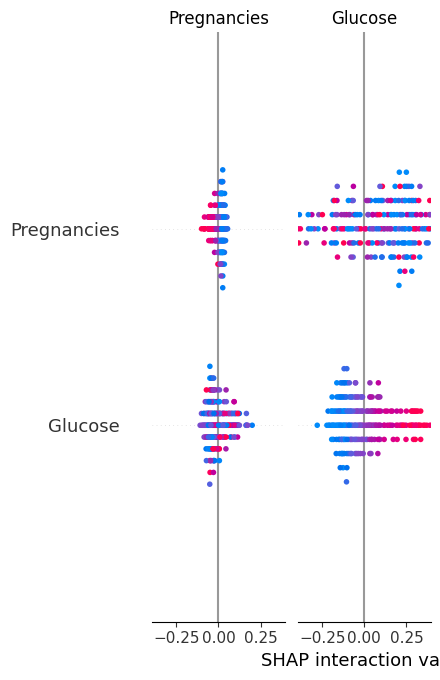

In [3]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)
# shap.plots.bar(shap_values[0])

In [12]:
import xgboost

# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)



In [13]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
22278,27.0,4,10.0,0,1,1,4,0,0.0,0.0,44.0,39
8950,27.0,4,13.0,4,10,0,4,0,0.0,0.0,40.0,39
7838,25.0,4,12.0,2,12,4,4,1,0.0,0.0,40.0,39
16505,46.0,4,3.0,2,14,4,0,1,0.0,1902.0,40.0,39
19140,45.0,4,7.0,0,14,0,4,1,0.0,2824.0,76.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
321,43.0,4,10.0,2,3,4,4,1,0.0,1485.0,50.0,39
19092,44.0,4,10.0,0,4,2,4,0,0.0,0.0,45.0,39
29928,47.0,6,16.0,2,14,4,4,1,0.0,2002.0,45.0,39
4507,52.0,4,10.0,2,7,4,4,1,0.0,0.0,40.0,39


In [14]:
y

array([False, False, False, ..., False, False, False])

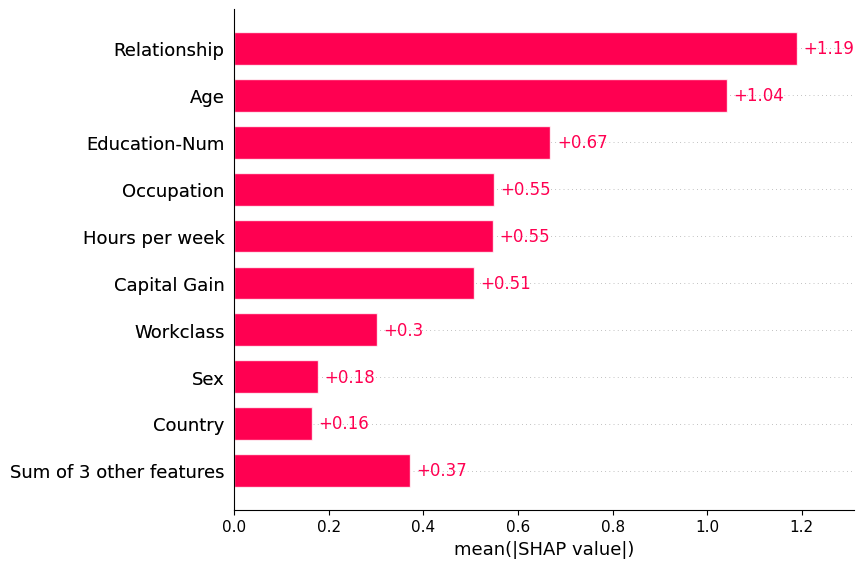

In [15]:
shap.plots.bar(shap_values)

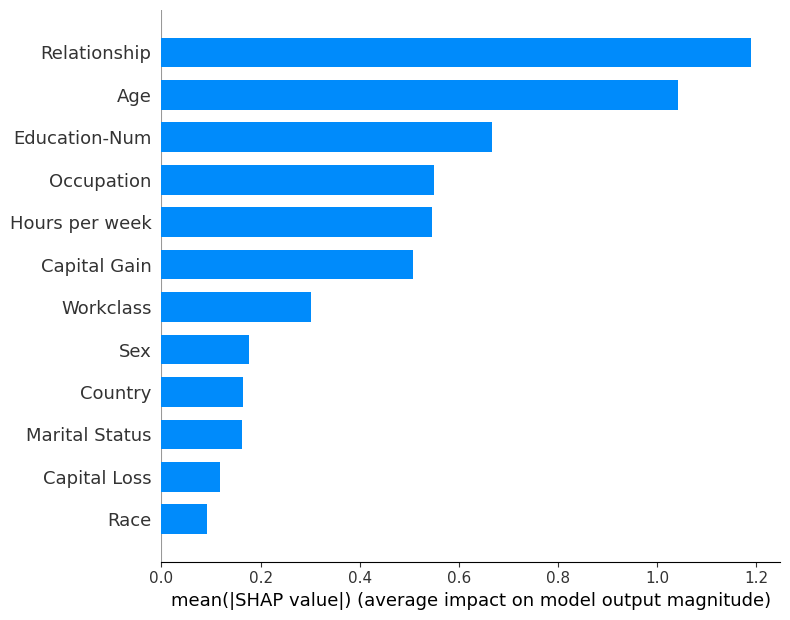

In [17]:
shap.summary_plot(shap_values, X, plot_type="bar")

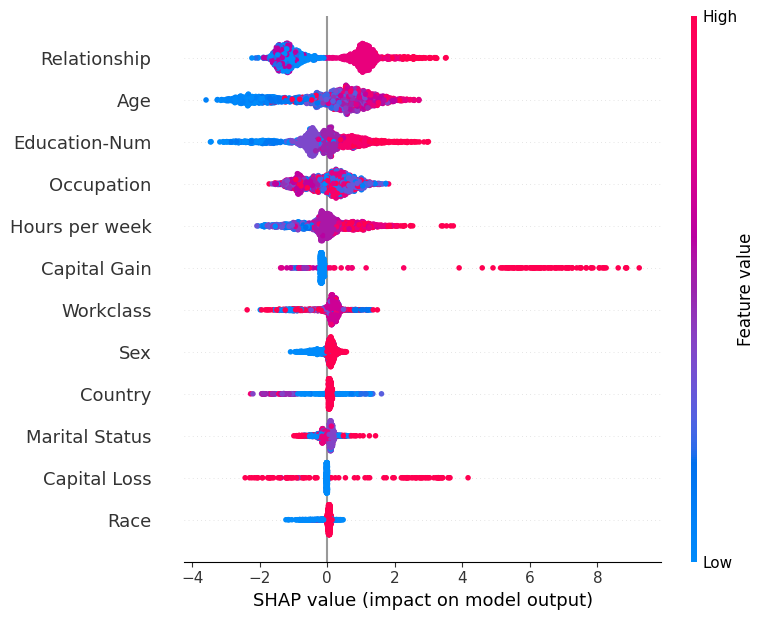

In [21]:
shap.summary_plot(shap_values, X)

### LIME
Local Interpretable Model-agnostic Explanations (LIME for short). Instead of providing a global understanding of the model on the entire dataset, LIME focuses on explaining the model’s prediction for individual instances.

LIME explainer can be set up using two main steps: (1) import the lime module, and (2) fit the explainer using the training data and the targets. During this phase, the mode is set to classification, which corresponds to the task being performed.

In [26]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

ModuleNotFoundError: No module named 'lime'